In [1]:
from time import time
from src.data_structures import *
from src.trapezoidal_map import *
from src.utils import *
from src.visualizer import *
import matplotlib.pyplot

In [2]:
import matplotlib.pyplot as plt
%matplotlib tk
mouse_points = []

def add_sections(event):
    x, y = event.xdata, event.ydata

    if x is not None and y is not None:
        if event.button == 1:
            mouse_points.append((x, y))
            plt.plot(x, y, "go")
            if len(mouse_points) % 2 == 0 and len(mouse_points) > 0:
                plt.plot([mouse_points[-2][0], mouse_points[-1][0]], [mouse_points[-2][1], mouse_points[-1][1]], 'b-')

            plt.draw()
        elif event.button == 3:
            plt.close()


fig, ax = plt.subplots()
ax.set_title("Left click to add points, right click to close the plot")

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

fig.canvas.mpl_connect('button_press_event', add_sections)

plt.show()

In [3]:
lines = []
for i in range(0, len(mouse_points) - 1, 2):
    x1, x2 = mouse_points[i][0], mouse_points[i + 1][0]
    if x1 < x2:
        lines.append((mouse_points[i], mouse_points[i + 1]))
    else:
        lines.append((mouse_points[i + 1], mouse_points[i]))

vis = Visualizer()
vis.add_line_segment(lines)
for line in lines:
    vis.add_point(line[0], color="blue")
    vis.add_point(line[1], color="blue")

vis.show()
print(lines)

[((28.387096774193548, 68.83116883116884), (69.19354838709677, 83.11688311688313)), ((17.25806451612903, 29.004329004329), (43.70967741935483, 38.311688311688314)), ((30.161290322580644, 48.701298701298704), (71.45161290322581, 55.41125541125542)), ((35.64516129032258, 20.995670995671), (60.483870967741936, 24.45887445887446))]


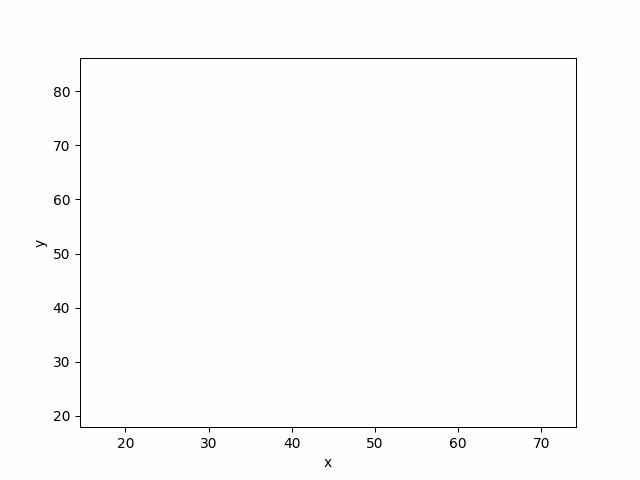

In [5]:
tm = TrapezoidalMap(lines)
tm.update_visualizer = True
tm.build_trapezoidal_map()
vis = tm.vis
vis.save_gif()
vis.show_gif()

Czas budowania mapy trapezowej dla 50000 odcinków: 15.7784 s


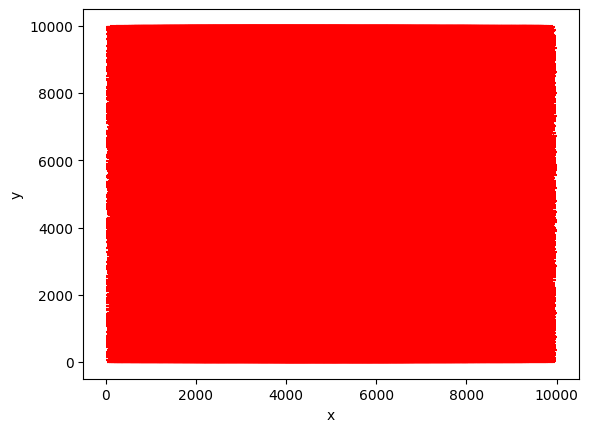

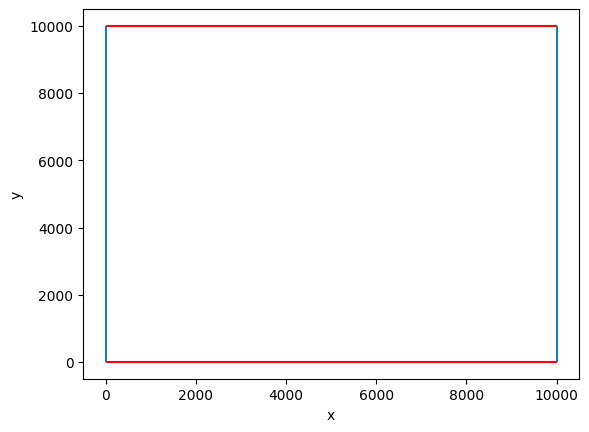

In [11]:
%matplotlib inline
sizes = [50000]
import sys
sys.setrecursionlimit(1000000)

for size in sizes:
    generated_segments = generateParallelSegments(10000, 10000, size-2)
    vis = Visualizer()
    vis.add_line_segment(generated_segments, color='red')
    vis.show()
    t1 = time()
    T = TrapezoidalMap(generated_segments)
    T.build_trapezoidal_map()
    vis = T.vis
    vis.show()
    t2 = time()
    print("Czas budowania mapy trapezowej dla", size, "odcinków: {ex_time:.4f} s".format(ex_time = t2 - t1))

In [13]:
pointCount = 100000
sizes = [100, 1000, 10000]
for size in sizes:
    generated_segments = generateParallelSegments(10000, 10000, size-2)
    T = TrapezoidalMap(generated_segments)
    T.build_trapezoidal_map()
    points = generateUniformPoints(10000, 10000, pointCount)
    
    t1 = time()
    for x,y in points:
        T.tree.find(T.tree.root, Point(x, y))
    t2 = time()
    print("Czas wyszukiwania dla mapy o ", size, " odcinkach: {ex_time:.4f} s".format(ex_time = t2 - t1))

Czas wyszukiwania dla mapy o  100  odcinkach: 1.4154 s
Czas wyszukiwania dla mapy o  1000  odcinkach: 1.7514 s
Czas wyszukiwania dla mapy o  10000  odcinkach: 2.8655 s
